# Q1 Importing libraries & Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing Path
path = r"C:\Users\abiya\01-2023 Instacart Basket Analysis"

In [3]:
# Importing the most updated dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_merged_all.pkl'))

# Q2 Addressing Data Security

In [4]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0              int64   
 2   order_id                int64   
 3   user_id                 int64   
 4   eval_set                object  
 5   order_number            int64   
 6   order_dow               int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   product_id              int64   
 10  add_to_cart_order       int64   
 11  reordered               int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  _merge                  category
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

# Q3 Creating regional segmentation of the dataset

In [5]:
#Creating states within regions
region = []
for value in df_ords_prods_all['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [6]:
#Creating the region column
df_ords_prods_all['region'] = region

In [7]:
df_ords_prods_all['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [8]:
region_spend = pd.crosstab(df_ords_prods_all['region'],df_ords_prods_all['spending_flag'],dropna = False)

In [9]:
region_spend.to_clipboard()

In [10]:
region_spend

spending_flag,High spender,Low spender
region,,
Midwest,156308,7447502
Northeast,108363,5619984
South,210508,10591102
West,160931,8139514


# Q4 Creating an exclusion flag

In [11]:
df_ords_prods_all.loc[df_ords_prods_all['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [12]:
df_ords_prods_all.loc[df_ords_prods_all['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [13]:
df_ords_prods_all['low_order_flag'].value_counts(dropna = False)

High order customer    30992664
Low order customer      1441548
Name: low_order_flag, dtype: int64

In [14]:
#Creating high order customer subset
df_high_order_customers = df_ords_prods_all[df_ords_prods_all['low_order_flag'] == 'High order customer']

In [15]:
df_high_order_customers.to_pickle(os.path.join(path, 'Data','Prepared Data', 'high_order_customers.pkl'))

# Q5 Creating Customer Profiles

In [16]:
df_ords_prods_all.describe()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_prior_orders,age,number_dependants,income
count,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07,3.243421e+07
mean,1.709860e+06,1.709860e+06,1.710748e+06,1.029374e+05,1.714192e+01,2.738810e+00,1.342500e+01,1.110485e+01,2.557778e+04,8.351176e+00,5.896888e-01,7.121649e+01,9.922231e+00,1.198114e+01,3.305217e+01,1.198115e+01,1.002913e+01,4.946521e+01,1.501872e+00,9.943525e+04
std,9.864638e+05,9.864638e+05,9.872996e+05,5.946649e+04,1.753489e+01,2.090047e+00,4.246351e+00,8.493052e+00,1.409614e+04,7.126688e+00,4.918902e-01,3.820429e+01,6.281190e+00,4.954311e+02,2.515449e+01,8.319086e+01,6.324770e+00,1.848553e+01,1.118871e+00,4.305473e+04
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.556130e+05,8.556130e+05,8.559450e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.390000e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.699800e+04
50%,1.709152e+06,1.709152e+06,1.711049e+06,1.026125e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.830000e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565947e+06,2.565947e+06,2.565510e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.260000e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421081e+06,3.421081e+06,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [17]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 40), 'age_profile'] = '18-40'
df_ords_prods_all.loc[(df_ords_prods_all['age'] > 40) & (df_ords_prods_all['age'] <= 65), 'age_profile'] = '41-65'
df_ords_prods_all.loc[(df_ords_prods_all['age'] > 65), 'age_profile'] = '65+'
df_ords_prods_all['age_profile'].value_counts(dropna = False)

41-65    12658478
18-40    11680516
65+       8095218
Name: age_profile, dtype: int64

# Q6 Visualizing the profiles

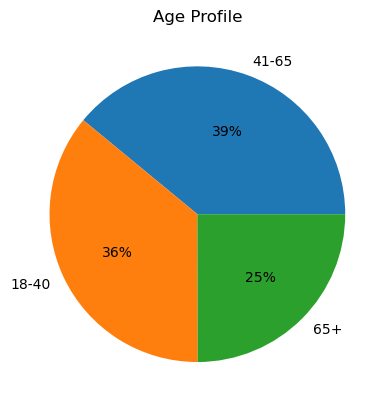

In [18]:
# Creating age pie chart
age_profile_pie = df_ords_prods_all['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', autopct=('%1.f%%'))

In [19]:
# Creating Age statistics
age_sums = df_ords_prods_all.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

days_since_prior_order                  prices           \
                               min   max       mean    min      max   
age_profile                                                           
18-40                          0.0  30.0  11.110050    1.0  99999.0   
41-65                          0.0  30.0  11.113735    1.0  99999.0   
65+                            0.0  30.0  11.083434    1.0  99999.0   

                                     
                  mean          sum  
age_profile                          
18-40        12.085853  141169003.7  
41-65        11.975049  151585891.3  
65+          11.839591   95844067.0

In [20]:
# Creating crosstab between ages and regions
crosstab_region_age = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['age_profile'], dropna = False)

# Q7 Aggregate variables

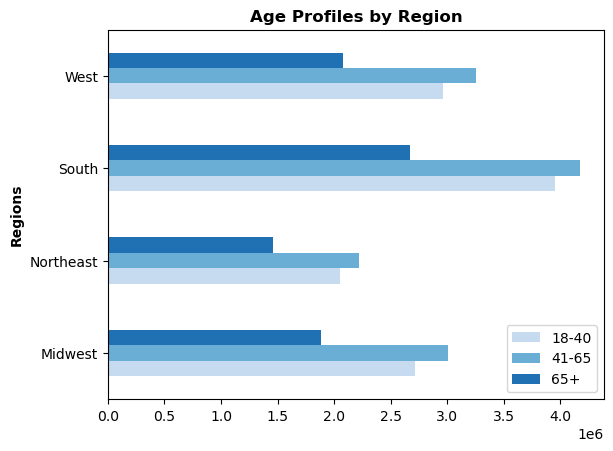

In [21]:
#Creating a stacked bar chart
region_age = crosstab_region_age.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

# Q8 Comparing customer profiles

In [22]:
# Importing department dataframe
df_dep_new = pd.read_csv(os.path.join(path, 'Data','Prepared Data', 'departments_wrangled.csv'))

In [23]:
df_dep_new.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dep_new

,department_id,department_id,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [24]:
df_dep_new.head()

,department_id,department_id,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [25]:
df_dep_new.values

array([[0, 'department', 'frozen', 'other', 'bakery', 'produce',
        'alcohol', 'international', 'beverages', 'pets',
        'dry goods pasta', 'bulk', 'personal care', 'meat seafood',
        'pantry', 'breakfast', 'canned goods', 'dairy eggs', 'household',
        'babies', 'snacks', 'deli', 'missing']], dtype=object)

In [26]:
df_dep_new.values[0][2:].tolist()

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

In [27]:
departments = df_dep_new.values[0][2:].tolist()

In [28]:
departments = pd.DataFrame(data = departments, columns = ["departments"])

In [29]:
departments

,departments
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [30]:
departments = departments.reset_index()

In [31]:
departments

,index,departments
0,0,frozen
1,1,other
2,2,bakery
3,3,produce
4,4,alcohol
5,5,international
6,6,beverages
7,7,pets
8,8,dry goods pasta
9,9,bulk


In [32]:
departments.rename(columns = {'index' : 'department_id'}, inplace = True)

In [33]:
departments

,department_id,departments
0,0,frozen
1,1,other
2,2,bakery
3,3,produce
4,4,alcohol
5,5,international
6,6,beverages
7,7,pets
8,8,dry goods pasta
9,9,bulk


In [34]:
departments['department_id'] = departments['department_id'] + 1

In [35]:
departments

,department_id,departments
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
departments

,department_id,departments
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
df_dep_new = departments

In [38]:
# Merging departments dataframe with df_ords_prods_all dataframe
df_all = df_ords_prods_all.merge(df_dep_new, on = 'department_id')

In [39]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,state,age,date_joined,number_dependants,family_status,income,region,low_order_flag,age_profile,departments
0,0,0,2539329,1,prior,1,2,8,11.114836,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
1,1,1,2398795,1,prior,2,3,7,15.000000,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
2,2,2,473747,1,prior,3,3,12,21.000000,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
3,3,3,2254736,1,prior,4,4,7,29.000000,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
4,4,4,431534,1,prior,5,4,15,28.000000,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages


# Q9 Producing Suitable Charts

In [40]:
# Creating crosstab of age and department
crosstab_dept_age = pd.crosstab(df_all['departments'], df_all['age_profile'], dropna = False)

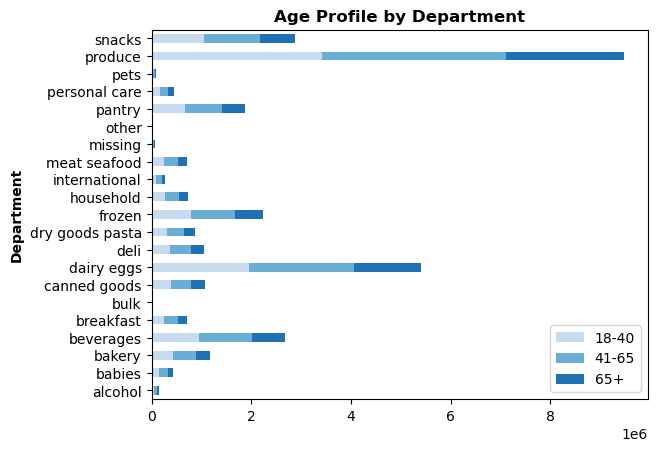

In [41]:
# Creating stacked bar chart of age group and department
dept_age = crosstab_dept_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

In [42]:
# Creating income profiles
df_all.loc[(df_all['income'] <= 50000), 'income_profile'] = '<=50k'
df_all.loc[(df_all['income'] > 50000) & (df_all['income'] <= 150000), 'income_profile'] = '50k - 150k'
df_all.loc[(df_all['income'] > 150000), 'income_profile'] = '150k+'
df_all['income_profile'].value_counts(dropna = False)

50k - 150k    24782003
150k+          4054338
<=50k          3597871
Name: income_profile, dtype: int64

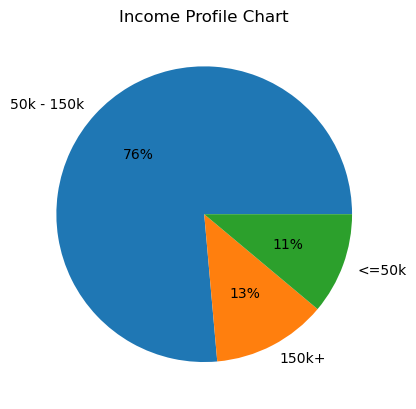

In [43]:
# Creating income profile pie chart
income_profile_pie = df_all['income_profile'].value_counts().plot.pie(title ='Income Profile Chart', label = '', autopct=('%1.f%%'))

In [44]:
# Creating income statistics
income_sums = df_all.groupby(['income_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
income_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
income_profile                                                           
150k+                             0.0  30.0  10.952008    1.0  99999.0   
50k - 150k                        0.0  30.0  11.064848    1.0  99999.0   
<=50k                             0.0  30.0  11.552571    1.0     25.0   

                                        
                     mean          sum  
income_profile                          
150k+           32.877480  133296417.3  
50k - 150k       9.328823  231186929.7  
<=50k            6.702746   24115615.0

In [45]:
# Create crosstab of regions and income grouos
crosstab_region_income = pd.crosstab(df_all['region'], df_all['income_profile'], dropna = False)

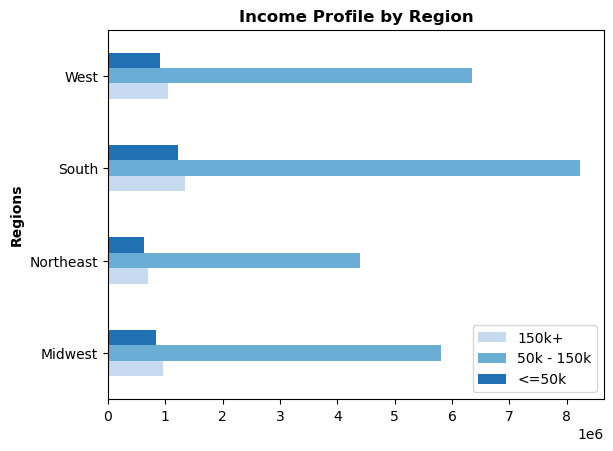

In [46]:
# Creating bar chart of the regions broken down by income groups
region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

In [47]:
# Creating a crosstab of department and income groups
crosstab_dept_income = pd.crosstab(df_all['departments'], df_all['income_profile'], dropna = False)

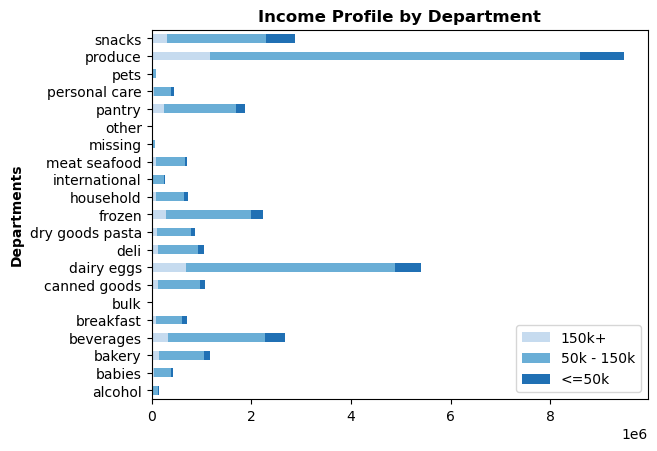

In [48]:
# Creating stacked bar chart of department broken down by income group
dept_income = crosstab_dept_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.title('Income Profile by Department', fontweight = 'bold')
plt.show()

In [49]:
# Creating Family Status Profiles
df_all.loc[(df_all['number_dependants'] == 0), 'family_profile'] = 'Single Adult'
df_all.loc[(df_all['number_dependants'] != 0), 'family_profile'] = 'Family'
df_all['family_profile'].value_counts(dropna = False)

Family          24329015
Single Adult     8105197
Name: family_profile, dtype: int64

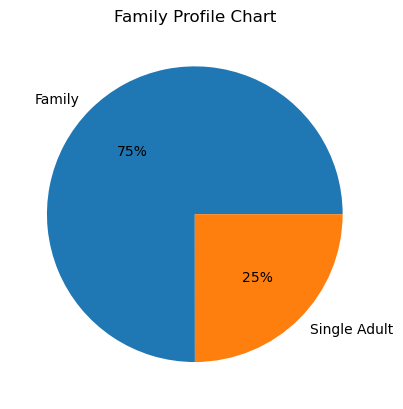

In [50]:
# Creating family status pie chart
family_profile_pie = df_all['family_profile'].value_counts().plot.pie(title = 'Family Profile Chart', label = '', autopct = ('%1.f%%'))

In [51]:
# Creating family status statistics
family_sums = df_all.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
family_profile                                                           
Family                            0.0  30.0  11.112191    1.0  99999.0   
Single Adult                      0.0  30.0  11.082797    1.0  99999.0   

                                        
                     mean          sum  
family_profile                          
Family          11.931538  290282560.7  
Single Adult    12.130045   98316401.3

In [52]:
# Crosstab of families and regions
crosstab_region_family = pd.crosstab(df_all['region'], df_all['family_profile'], dropna = False)

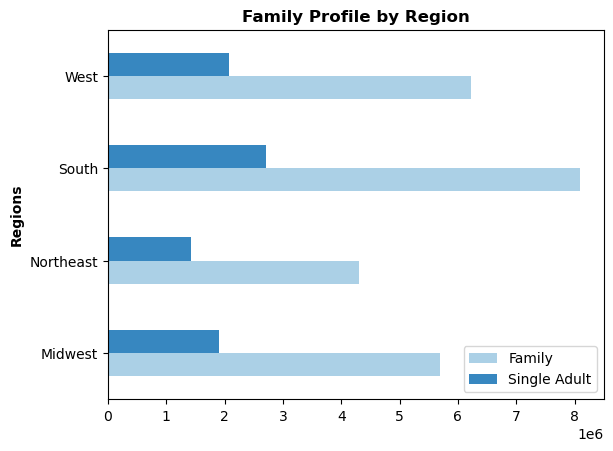

In [53]:
# Creating Stacked bar chart of family groups across the regions
region_family = crosstab_region_family.plot(kind = 'barh', color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Profile by Region', fontweight = 'bold')
plt.show()

In [54]:
# Creating crosstab of family profile and department
crosstab_dept_family = pd.crosstab(df_all['departments'], df_all['family_profile'], dropna = False)

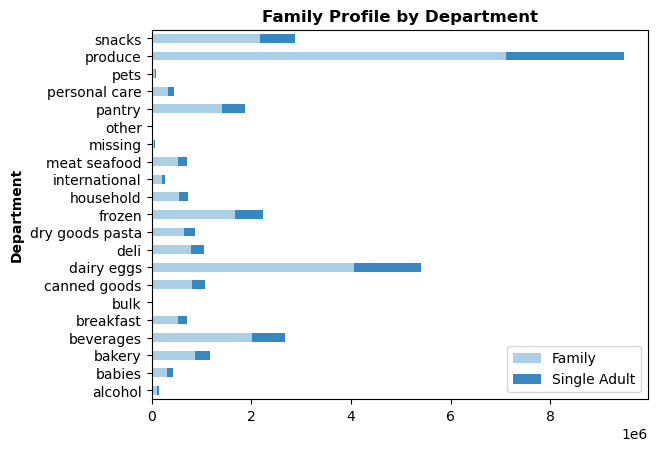

In [55]:
# Creating stacked bar chart of family profiles by department
dept_family = crosstab_dept_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Family Profile by Department', fontweight = 'bold')
plt.show()

In [56]:
# Profiling orders from each day of the week
df_all['order_dow'].value_counts(dropna = False)

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: order_dow, dtype: int64

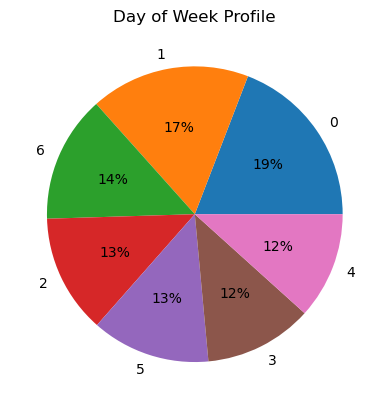

In [57]:
# Creating Pie chart of orders for each day of the week
day_of_week_pie = df_all['order_dow'].value_counts().plot.pie(title = 'Day of Week Profile', label = '', autopct = ('%1.f%%'))

In [58]:
# Creating statistics of the day of the week orders profil
day_of_week_sums = df_all.groupby(['order_dow']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
day_of_week_sums

days_since_prior_order                  prices                      \
                             min   max       mean    min      max       mean   
order_dow                                                                      
0                            0.0  30.0  11.580899    1.0  99999.0  11.168753   
1                            0.0  30.0  11.286885    1.0  99999.0  12.181988   
2                            0.0  30.0  11.271796    1.0  99999.0  12.356842   
3                            0.0  30.0  10.890156    1.0  99999.0  12.235716   
4                            0.0  30.0  10.582256    1.0  99999.0  12.170657   
5                            0.0  30.0  10.491822    1.0  99999.0  12.884196   
6                            0.0  30.0  11.258889    1.0  99999.0  11.275498   

                       
                  sum  
order_dow              
0          69353847.7  
1          69021070.3  
2          52118267.2  
3          47035265.1  
4          46092628.3  
5          54235366.8  
6          50742516.6

In [59]:
# Creating crosstab of day of the week orders and regions
crosstab_region_day_of_week = pd.crosstab(df_all['region'], df_all['order_dow'], dropna = False)

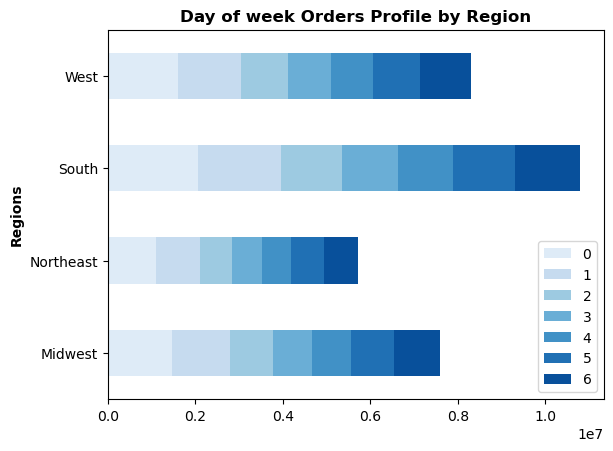

In [60]:
# Creating stacked bar chart of day of the week orders broken down by regions
region_day_of_week = crosstab_region_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Day of week Orders Profile by Region', fontweight = 'bold')
plt.show()

In [61]:
# Creating crosstab of orders day of the week and departments
crosstab_dept_day_of_week = pd.crosstab(df_all['departments'], df_all['order_dow'], dropna = False)

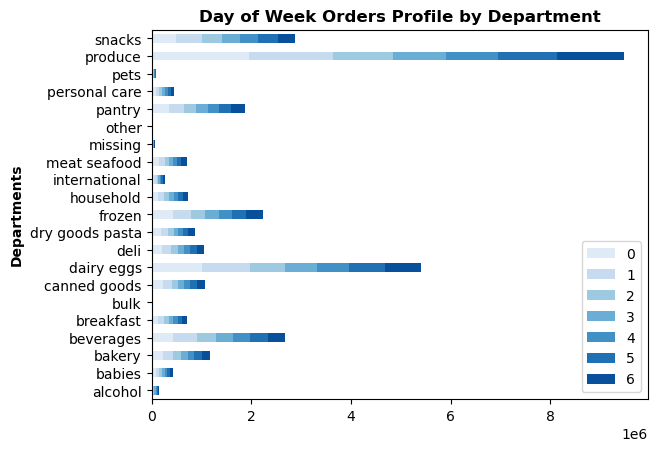

In [62]:
# Creating stacked bar chart of orders day of the week broken down by department
dept_day_of_week = crosstab_dept_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.title('Day of Week Orders Profile by Department', fontweight = 'bold')
plt.show()

# Q10 Exporting Final Data Set

In [63]:
# Checking the current shape
df_all.shape

(32434212, 40)

In [64]:
df_all.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'order_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'departments', 'income_profile', 'family_profile'],
      dtype='object')

In [65]:
# Removing un-needed columns
df_all = df_all.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'aisle_id'])

In [66]:
# Checking the new shape
df_all.shape

(32434212, 37)

In [67]:
age_profile_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_profile_pie.png'))

In [68]:
region_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_age.png'))

In [69]:
dept_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_age.png'))

In [70]:
income_profile_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_profile_pie.png'))

In [71]:
region_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_income.png'))

In [72]:
dept_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_income.png'))

In [73]:
family_profile_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_profile_pie.png'))

In [74]:
region_family.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_family.png'))

In [75]:
dept_family.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_family.png'))

In [76]:
day_of_week_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'day_of_week_pie.png'))

In [77]:
region_day_of_week.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_day_of_week.png'))

In [78]:
dept_day_of_week.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dept_day_of_week.png'))

In [79]:
df_all.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))